## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.1 ; cuda:  cu121


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv5

In [ ]:
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5

%cd {HOME}/yolov5
!pip install -r requirements.txt

from IPython import display
display.clear_output()

## Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


## Install Detectron2

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

detectron2: 0.6


## Install Supervision

In [ ]:
!pip install supervision==0.2.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.2.0


## Download data

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr" -O market-square.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-12-23 12:51:28--  https://docs.google.com/uc?export=download&confirm=&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.113, 142.251.2.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mmk676ug465jjim87qv6l0h6fboqarmr/1703335875000/04309230031174164349/*/1vVrEVMxucHgqGd7vAa501ASojbeGPhIr?e=download&uuid=c0f49b56-2a65-4496-bef9-cdcb5c150e97 [following]
--2023-12-23 12:51:29--  https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mmk676ug465jjim87qv6l0h6fboqarmr/1703335875000/04309230031174164349/*/1vVrEVMxucHgqGd7vAa501ASojbeGPhIr?e=download&uuid=c0f49b56-2a65-4496-bef9-cdcb5c150e97
Resolving doc-0k-ag-docs.googleusercontent.com (doc-0k-ag-docs.googleusercontent.com)... 142.251.2.13

In [ ]:
MARKET_SQUARE_VIDEO_PATH = f"{HOME}/meydan.mp4"

## Simple YOLOv8 Shopping Mall Example

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 181MB/s]


**NOTE:** Let's start vanilla YOLOv8 inference pipeline.

In [ ]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(MALL_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

NameError: ignored

**NOTE:** In this demo, our goal is primarily to detect people. Therefore, let's filter out detections related to other classes. By the way, we can also replace our bounding box labels with more human-friendly ones.

## Advanced YOLOv5 Market Square Example

In [ ]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5x6')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-12-23 Python-3.10.12 torch-2.1.0+cu121 CPU

100%|██████████| 270M/270M [00:01<00:00, 185MB/s]

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients, 209.6 GFLOPs
Adding AutoShape... 


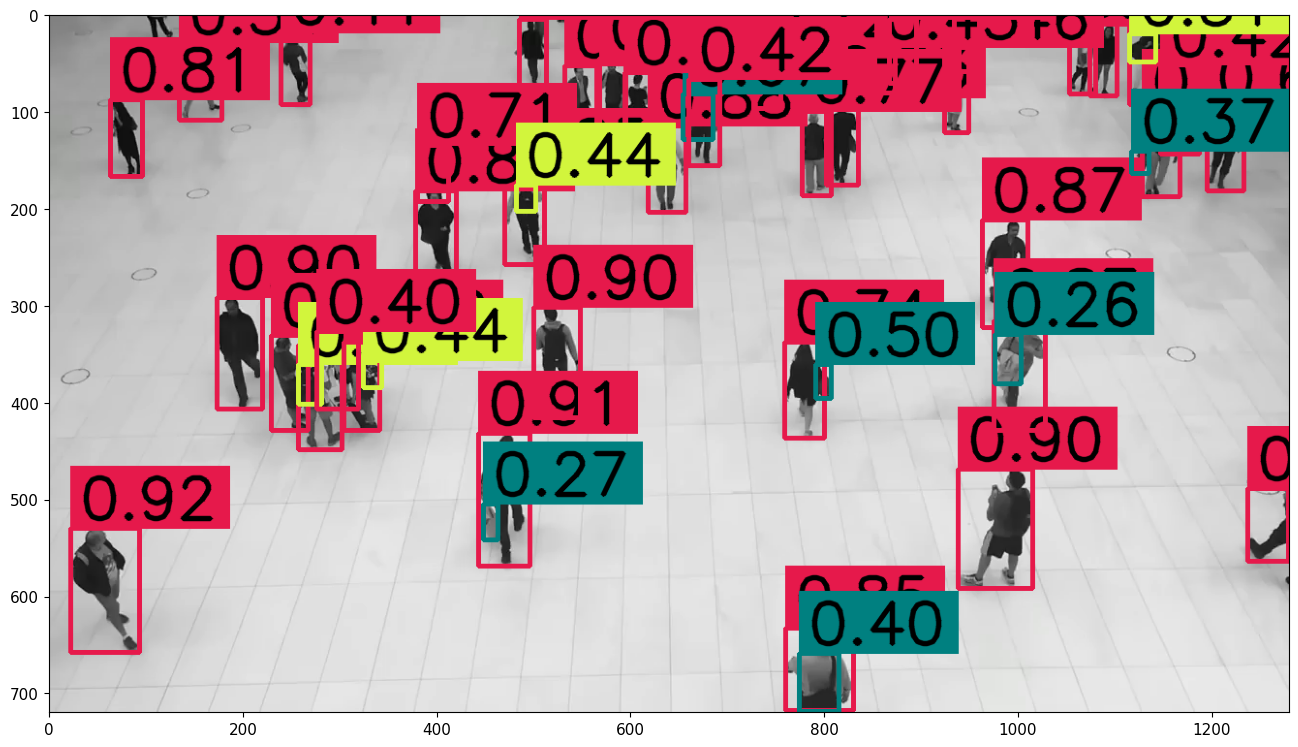

In [ ]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(MARKET_SQUARE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

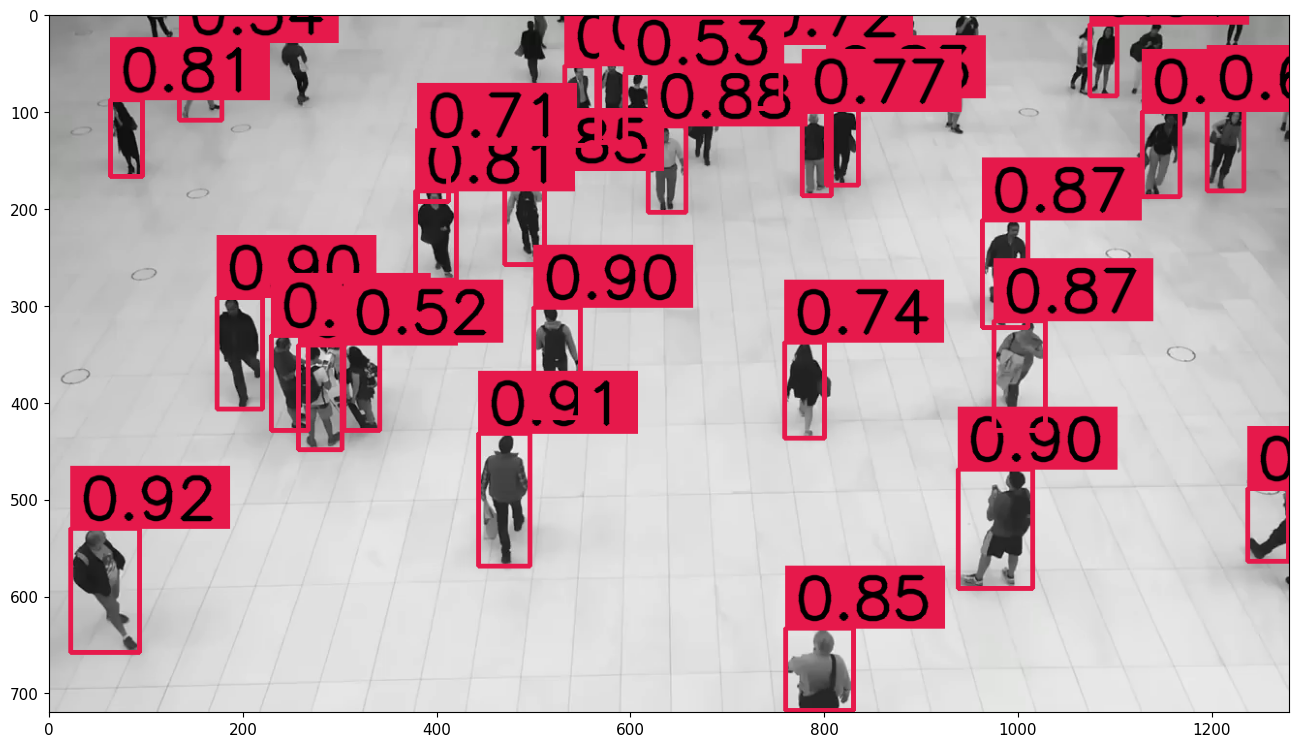

In [ ]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(MARKET_SQUARE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

In [ ]:
len(detections)

28

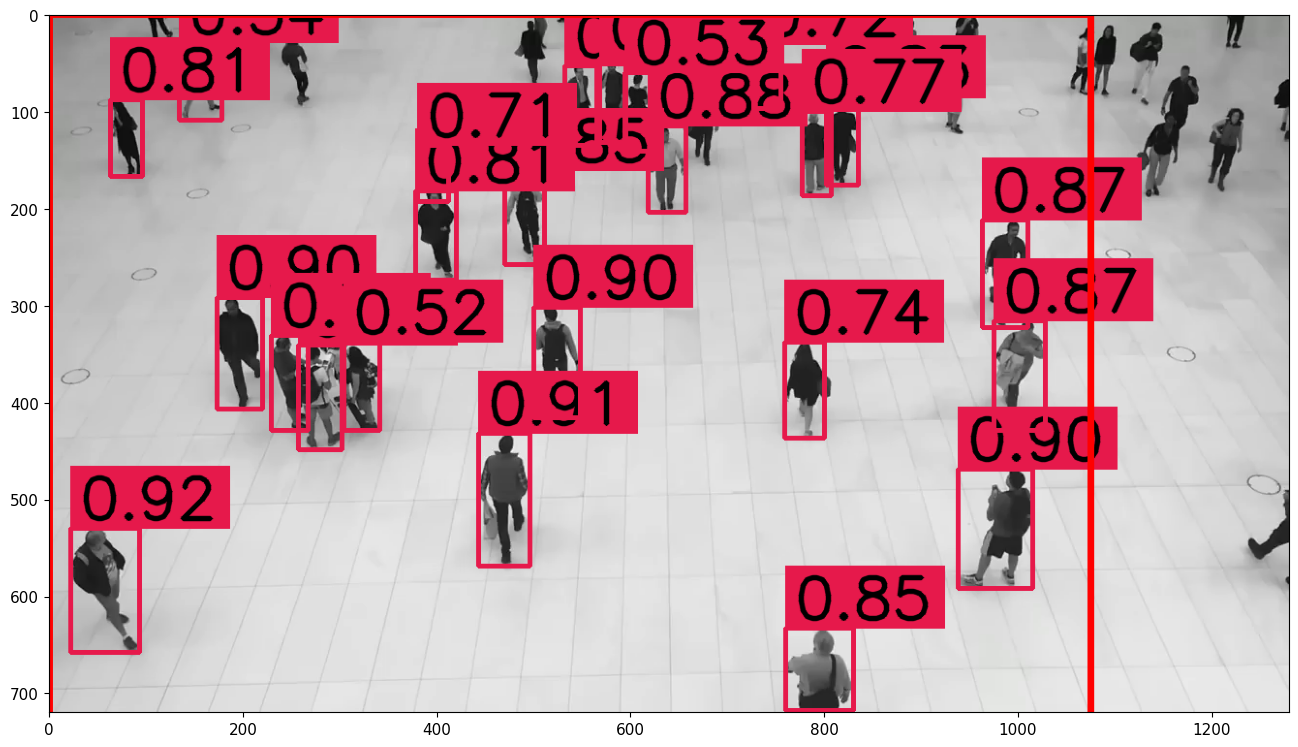

In [ ]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [0, 0],
    [1080 - 5, 0],
    [1080 - 5, 1300 - 5],
    [0, 1300 - 5]
])
video_info = sv.VideoInfo.from_video_path(MARKET_SQUARE_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

# extract video frame
generator = sv.get_video_frames_generator(MARKET_SQUARE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
mask = zone.trigger(detections=detections)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5) & mask]

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = sv.draw_polygon(scene=frame, polygon=polygon, color=sv.Color.red(), thickness=6)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

**NOTE:** Importantly, zones can have a much more complex geometry.

In [ ]:
sv.VideoInfo.from_video_path(MARKET_SQUARE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=25, total_frames=341)

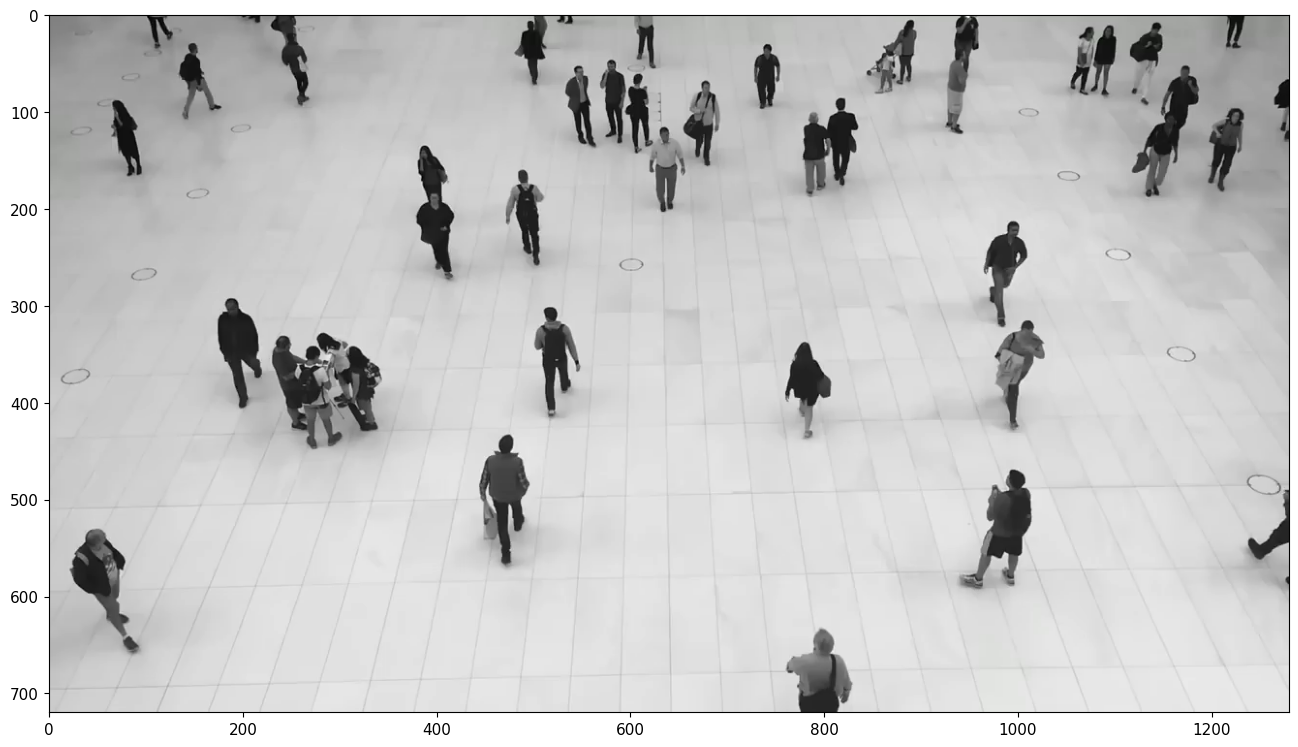

In [ ]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [540,  985],
    [1620, 985],
    [2160, 1920],
    [1620, 2855],
    [540,  2855],
    [0,    1920]
])
video_info = sv.VideoInfo.from_video_path(MARKET_SQUARE_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

# extract video frame
generator = sv.get_video_frames_generator(MARKET_SQUARE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
mask = zone.trigger(detections=detections)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5) & mask]

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = sv.draw_polygon(scene=frame, polygon=polygon, color=sv.Color.red(), thickness=6)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

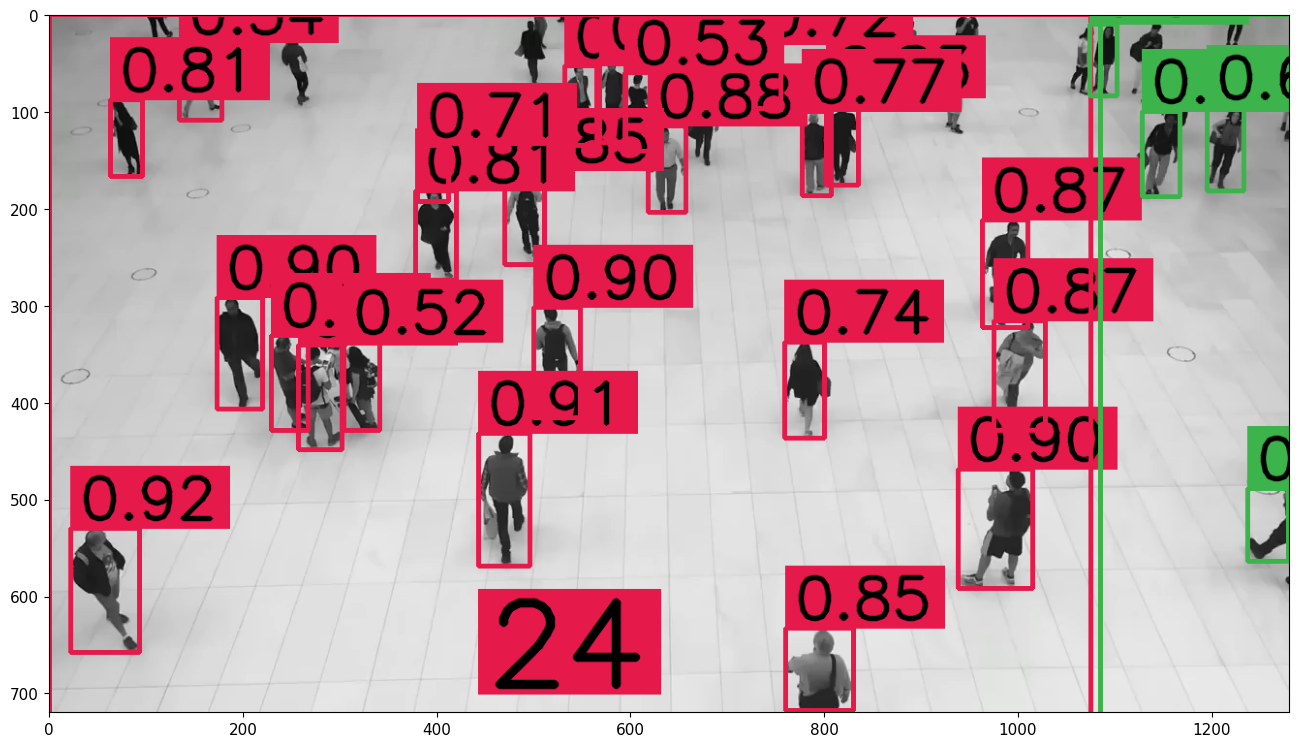

In [ ]:
colors = sv.ColorPalette.default()
polygons = [
    np.array([
        [0, 0],
        [1080 - 5, 0],
        [1080 - 5, 1300 - 5],
        [0, 1300 - 5]
    ], np.int32),
    np.array([
        [1080 + 5, 0],
        [2160, 0],
        [2160, 1300 - 5],
        [1080 + 5, 1300 - 5]
    ], np.int32),
    np.array([
        [0, 1300 + 5],
        [1080 - 5, 1300 + 5],
        [1080 - 5, 3840],
        [0, 3840]
    ], np.int32),
    np.array([
        [1080 + 5, 1300 + 5],
        [2160, 1300 + 5],
        [2160, 3840],
        [1080 + 5, 3840]
    ], np.int32)
]
video_info = sv.VideoInfo.from_video_path(MARKET_SQUARE_VIDEO_PATH)

zones = [
    sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone,
        color=colors.by_idx(index),
        thickness=4,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index),
        thickness=4,
        text_thickness=4,
        text_scale=2
        )
    for index
    in range(len(polygons))
]

# extract video frame
generator = sv.get_video_frames_generator(MARKET_SQUARE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
    mask = zone.trigger(detections=detections)
    detections_filtered = detections[mask]
    frame = box_annotator.annotate(scene=frame, detections=detections_filtered)
    frame = zone_annotator.annotate(scene=frame)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

**NOTE:** Or we can go compleatly crazy.

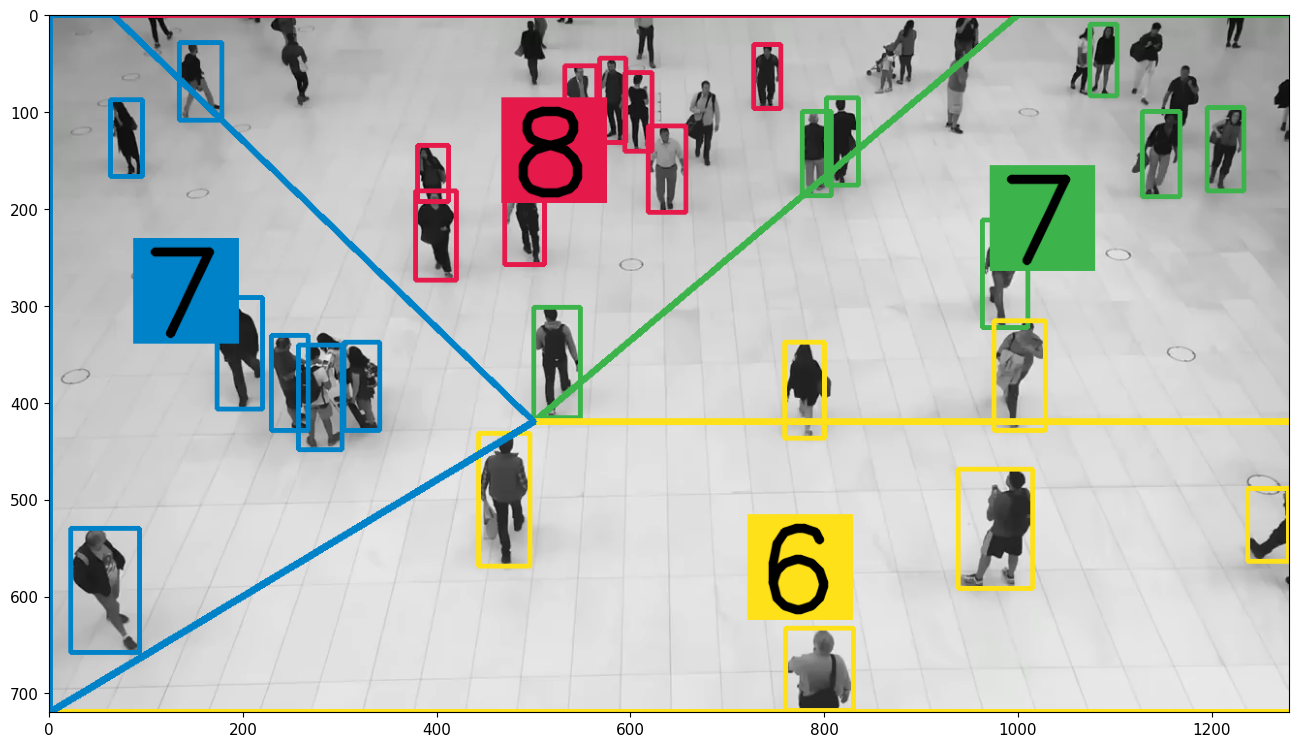

In [ ]:
colors = sv.ColorPalette.default()
polygons = [
    np.array([
        [65,  0 ],
        [1000, 0 ],
        [500, 420]
    ], np.int32),
    np.array([
        [1000,  0],
        [1300,  0],
        [1300,  420],
        [500, 420]
    ], np.int32),
    np.array([
        [500,  420],
        [1300, 420],
        [1300,  720],
        [0,  720]
    ], np.int32),
    np.array([
        [500,  420],
        [0,    720  ],
        [0, 0   ],
        [65,  0 ]
    ], np.int32)
]
video_info = sv.VideoInfo.from_video_path(MARKET_SQUARE_VIDEO_PATH)

zones = [
    sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone,
        color=colors.by_idx(index),
        thickness=6,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index),
        thickness=4,
        text_thickness=4,
        text_scale=2
        )
    for index
    in range(len(polygons))
]

# extract video frame
generator = sv.get_video_frames_generator(MARKET_SQUARE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
    mask = zone.trigger(detections=detections)
    detections_filtered = detections[mask]
    frame = box_annotator.annotate(scene=frame, detections=detections_filtered, skip_label=True)
    frame = zone_annotator.annotate(scene=frame)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

In [ ]:
colors = sv.ColorPalette.default()
polygons = [
    np.array([
        [65,  0 ],
        [1000, 0 ],
        [500, 420]
    ], np.int32),
    np.array([
        [1000,  0],
        [1300,  0],
        [1300,  420],
        [500, 420]
    ], np.int32),
    np.array([
        [500,  420],
        [1300, 420],
        [1300,  720],
        [0,  720]
    ], np.int32),
    np.array([
        [500,  420],
        [0,    720  ],
        [0, 0   ],
        [65,  0 ]
    ], np.int32)
]
video_info = sv.VideoInfo.from_video_path(MARKET_SQUARE_VIDEO_PATH)

zones = [
    sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone,
        color=colors.by_idx(index),
        thickness=6,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index),
        thickness=4,
        text_thickness=4,
        text_scale=2
        )
    for index
    in range(len(polygons))
]

def process_frame(frame: np.ndarray, i) -> np.ndarray:
    print(i)
    # detect
    results = model(frame, size=1280)
    detections = sv.Detections.from_yolov5(results)
    detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

    for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
        mask = zone.trigger(detections=detections)
        detections_filtered = detections[mask]
        frame = box_annotator.annotate(scene=frame, detections=detections_filtered, skip_label=True)
        frame = zone_annotator.annotate(scene=frame)

    return frame

sv.process_video(source_path=MARKET_SQUARE_VIDEO_PATH, target_path=f"{HOME}/market-square-result.mp4", callback=process_frame)

from IPython import display
display.clear_output()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
